# Convertendo arquivos para HTML

A transformação do tipo xls para html precisou ser feita manualmente visto que o conteúdo não condizia com o formato do arquivo.

# Convertendo arquivos para xlsx

In [23]:
import os
import pandas as pd

pasta_origem = './data'
pasta_destino = './data'


arquivos_html = [arq for arq in os.listdir(pasta_origem) if arq.endswith('.html')]

# Loop pelos arquivos e converter para Excel
for arquivo_html in arquivos_html:
    caminho_arquivo_html = os.path.join(pasta_origem, arquivo_html)

    # Ler o conteúdo do arquivo HTML
    with open(caminho_arquivo_html, 'r', encoding='utf-8') as arquivo_html:
        conteudo_html = arquivo_html.read()

    # Analisar o HTML com BeautifulSoup
    soup = BeautifulSoup(conteudo_html, 'html.parser')

    # Encontrar tabelas no HTML
    tabelas = soup.find_all('table')

    # Extrair o nome do arquivo sem a extensão
    nome_arquivo_sem_extensao = os.path.splitext(arquivo_html)[0]

    # Converter tabelas para DataFrames pandas
    dataframes = [pd.read_html(str(tabela))[0] for tabela in tabelas]

    # Salvar cada DataFrame em um arquivo Excel na pasta de destino
    for i, df in enumerate(dataframes):
        nome_arquivo_excel = f'{nome_arquivo_sem_extensao}_tabela_{i + 1}.xlsx'
        caminho_arquivo_excel = os.path.join(pasta_destino, nome_arquivo_excel)
        df.to_excel(caminho_arquivo_excel, index=False)

print('Conversão concluída!')

Conversão concluída!


# Unificando arquivos em um mesmo dataframe

In [112]:
pasta_origem = './data'

arquivos_xlsx = [arq for arq in os.listdir(pasta_origem) if arq.endswith('.xlsx')]

# Unindo todos os arquivos xlsx em um único DataFrame
lista_df = []
for arquivo_xlsx in arquivos_xlsx:
    caminho_arquivo_xlsx = os.path.join(pasta_origem, arquivo_xlsx)
    df = pd.read_excel(caminho_arquivo_xlsx)
    lista_df.append(df)

df_completo = pd.concat(lista_df)

df_completo.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,DataHora (GMT),Bateria (Volts ),CorrPSol (Logico ),DirVelVentoMax (oNV ),DirVento (oNV ),Pluvio (mm ),RadSolAcum (MJ/m2 ),TempAr (oC ),TempMax (oC ),TempMin (oC ),UmidInt (% ),UmidRel (% ),VelVento10m (m/s ),VelVentoMax (m/s )
1,2012-12-30 21:00:00,12.6,0,150,90,5.75,3.8,29.5,32.5,19,20,44,10.1,21.3
2,2012-12-30 18:00:00,12.8,1,90,110,5.75,10.8,31,35,19,15,45,9.2,24.4
3,2012-12-30 15:00:00,12.8,1,100,80,5.75,9.5,29.5,35,19,20,53,12.2,25.4
4,2012-12-30 12:00:00,12.6,1,80,110,5.75,5.2,25.5,35,19,15,63,1,23.6


# Isolating the temperature data from the rest of the data

In [113]:
df_completo.columns = df_completo.iloc[0]
df_completo = df_completo.drop(0)
temperature = df_completo[['DataHora (GMT)','TempAr (oC )','TempMax (oC )','TempMin (oC )']]
temperature.head()

,DataHora (GMT),TempAr (oC ),TempMax (oC ),TempMin (oC )
1,2012-12-30 21:00:00,29.5,32.5,19
2,2012-12-30 18:00:00,31,35,19
3,2012-12-30 15:00:00,29.5,35,19
4,2012-12-30 12:00:00,25.5,35,19
5,2012-12-30 09:00:00,19.5,35,19


In [107]:
temperature.dtypes

0
DataHora (GMT)    object
TempAr (oC )      object
TempMax (oC )     object
TempMin (oC )     object
dtype: object

In [114]:
# formating date

temperature['data'] = temperature['DataHora (GMT)'].str.split().str[0]
temperature['ano'] = temperature['data'].str.split('-').str[0].astype(int)
temperature['mes'] = temperature['data'].str.split('-').str[1].astype(int)
temperature['dia'] = temperature['data'].str.split('-').str[2].astype(int)

temperature.head()

/tmp/ipykernel_15829/3426155030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature['data'] = temperature['DataHora (GMT)'].str.split().str[0]
/tmp/ipykernel_15829/3426155030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature['ano'] = temperature['data'].str.split('-').str[0].astype(int)
/tmp/ipykernel_15829/3426155030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,DataHora (GMT),TempAr (oC ),TempMax (oC ),TempMin (oC ),data,ano,mes,dia
1,2012-12-30 21:00:00,29.5,32.5,19,2012-12-30,2012,12,30
2,2012-12-30 18:00:00,31,35,19,2012-12-30,2012,12,30
3,2012-12-30 15:00:00,29.5,35,19,2012-12-30,2012,12,30
4,2012-12-30 12:00:00,25.5,35,19,2012-12-30,2012,12,30
5,2012-12-30 09:00:00,19.5,35,19,2012-12-30,2012,12,30


# Analysing the temperature tempMax

In [115]:
import matplotlib.pyplot as plt

# Ordenando o DataFrame pelo valor da coluna 'data'


temperature['TempMax (oC )'] = pd.to_numeric(temperature['TempMax (oC )'], errors='coerce')
temperature = temperature.sort_values(by='TempMax (oC )', ascending=False)

temperature = temperature.drop_duplicates(subset='ano', keep='first')

# Convertendo a coluna 'data' para o tipo datetime
temperature['data'] = pd.to_datetime(temperature['data'])
temperature = temperature.sort_values(by='ano')



/tmp/ipykernel_15829/2948891067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature['TempMax (oC )'] = pd.to_numeric(temperature['TempMax (oC )'], errors='coerce')


In [116]:
temperature

,DataHora (GMT),TempAr (oC ),TempMax (oC ),TempMin (oC ),data,ano,mes,dia
459,1999-10-19 21:00:00,31,36.5,18.5,1999-10-19,1999,10,19
676,2000-10-07 12:00:00,27,36.0,19,2000-10-07,2000,10,7
430,2001-11-07 03:00:00,25.5,38.0,22,2001-11-07,2001,11,7
66,2002-12-22 18:00:00,37,38.0,16.5,2002-12-22,2002,12,22
631,2003-10-13 03:00:00,23,36.5,17,2003-10-13,2003,10,13
375,2004-11-13 18:00:00,37.5,38.0,22,2004-11-13,2004,11,13
764,2005-09-22 12:00:00,25.5,37.5,21,2005-09-22,2005,9,22
2619,2006-01-27 15:00:00,33,38.0,21,2006-01-27,2006,1,27
586,2007-10-18 18:00:00,35.5,37.5,18,2007-10-18,2007,10,18
783,2008-09-23 21:00:00,32,38.0,18.5,2008-09-23,2008,9,23


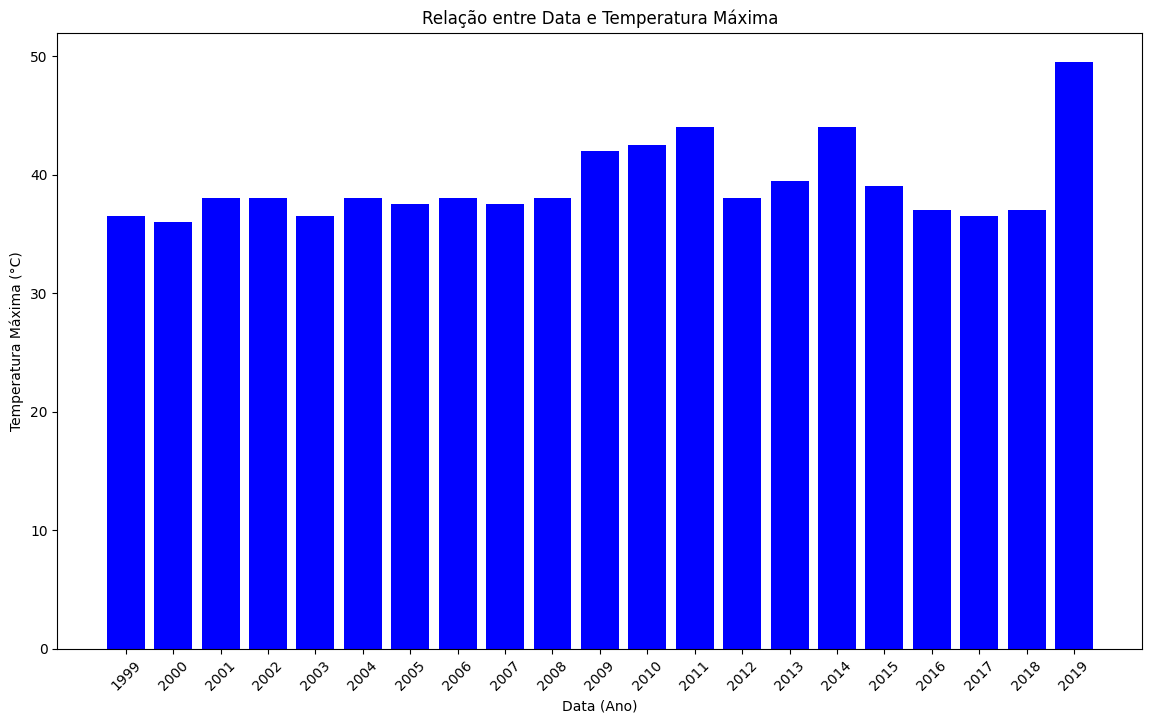

In [117]:
# Criando o gráfico de barras
plt.figure(figsize=(14, 8), dpi=100)
plt.bar(temperature['ano'], temperature['TempMax (oC )'], color='blue')

# Adicionando rótulos e título
plt.xlabel('Data (Ano)')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Relação entre Data e Temperatura Máxima')

# Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.xticks(temperature['ano'],rotation=45)

# Exibindo o gráfico
plt.show()